In [1]:
import pandas as pd
from pathlib import *
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import numpy as np
import itertools
#from arcgis.features import GeoAccessor, GeoSeriesAccessor
from scipy.stats import pearsonr
#import geopandas as gpd
import seaborn as sns
#from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import text
import pathlib
#import statsmodels.api as sm
#sns.set_theme()
import json
import glob
import dask.dataframe as dd
import datatable as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
folder_2019_2020=Path(r'agile\2019_2020FLCA')
folder_2019_2020

WindowsPath('D:/Safegraph_inno/agile/2019_2020FLCA')

In [4]:
%%time
#read files in the folder 2019 at once
dfs = {f.stem: pd.read_csv(f) for f in folder_2019_2020.glob('*.csv')}
#dfs

Wall time: 22.7 s


In [5]:
%%time
#assign variable names to be the same as file names
for name, df in dfs.items():
    locals()[name] = df

Wall time: 0 ns


In [6]:
%%time
#combine data frames
df_2019_2020 = pd.concat([wk1_2019, wk2_2019, wk3_2019,wk4_2019, wk5_2019,wk6_2019, wk7_2019, wk8_2019, wk9_2019,
                          wk1_2020, wk2_2020, wk3_2020,wk4_2020, wk5_2020,wk6_2020, wk7_2020, wk8_2020, wk9_2020],
                            axis=0)
df_2019_2020.head()

Wall time: 1.24 s


,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
0,8,223-225@8fw-25t-rrk,New Jerusalem P B Church,Religious Organizations,Religious Organizations,25.853776,-80.211400,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,7.0,5.0,"[0,1,1,0,1,0,4]",2727.0
1,84,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2019-03-04T00:00:00-06:00,2019-03-11T00:00:00-05:00,154.0,77.0,"[27,31,19,32,22,20,3]",14465.0
2,101,225-222@5vh-s95-xnq,Bethel Full Gospel Fellowship,Religious Organizations,Religious Organizations,38.007526,-121.356627,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,50.0,15.0,"[3,7,5,8,9,9,9]",3274.0
3,104,229-222@5z5-3pn-x5z,Kaban Persian Restaurant,Restaurants and Other Eating Places,Full-Service Restaurants,34.129896,-118.348719,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,12.0,12.0,"[1,1,0,2,5,2,1]",7384.0
4,137,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,40.0,20.0,"[6,8,7,10,8,1,0]",11974.0


In [7]:
df_2019_2020_FL= df_2019_2020.query('region =="FL"')
df_2019_2020_FL

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
0,8,223-225@8fw-25t-rrk,New Jerusalem P B Church,Religious Organizations,Religious Organizations,25.853776,-80.211400,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,7.0,5.0,"[0,1,1,0,1,0,4]",2727.0
1,84,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2019-03-04T00:00:00-06:00,2019-03-11T00:00:00-05:00,154.0,77.0,"[27,31,19,32,22,20,3]",14465.0
4,137,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,40.0,20.0,"[6,8,7,10,8,1,0]",11974.0
6,174,222-222@8fw-6sj-mff,West Broward Community Church,Religious Organizations,Religious Organizations,26.061143,-80.388763,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,8.0,8.0,"[0,0,6,2,0,0,0]",8452.0
9,253,222-222@8dj-mz6-m6k,North Brandon Family Ymca,Individual and Family Services,Other Individual and Family Services,27.966488,-82.278596,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,96.0,65.0,"[13,17,22,18,17,7,2]",6259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384656,12891179,223-222@8fy-8dt-8y9,Al's Original Pizza,Restaurants and Other Eating Places,Full-Service Restaurants,28.382874,-81.404086,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,17.0,17.0,"[2,5,2,5,1,0,2]",2280.0
384657,12891231,223-222@8fy-832-kj9,Medical Injury Care Provider Network,Offices of Other Health Practitioners,"Offices of Physical, Occupational and Speech T...",28.553178,-81.403909,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,11.0,7.0,"[3,1,4,2,0,1,0]",13666.0
384662,12891567,223-222@8fy-2r2-xkf,Audiohouse Custom Electronics Design & Install...,Electronics and Appliance Stores,Electronics Stores,27.638616,-80.384790,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,10.0,8.0,"[1,2,2,2,2,1,0]",5534.0
384671,12892033,222-222@8f4-5vd-zvf,Scenic Hills Church Of Christ,Religious Organizations,Religious Organizations,30.531957,-87.238617,FL,2020-04-27T00:00:00-05:00,2020-05-04T00:00:00-05:00,17.0,9.0,"[2,5,2,5,2,0,1]",14728.0


In [8]:
#categories with atleast 100 POIs in top category

df_2019_2020_categories=df_2019_2020_FL.groupby('top_category')['location_name'].count()
categories_over100=df_2019_2020_categories[df_2019_2020_categories>=50]
#df_2019_categories #182 categories
categories_over100.sort_values(ascending=False)

top_category
Restaurants and Other Eating Places                                742514
Religious Organizations                                            193742
Other Amusement and Recreation Industries                          174045
Museums, Historical Sites, and Similar Institutions                126322
Gasoline Stations                                                  120810
                                                                    ...  
Securities and Commodity Contracts Intermediation and Brokerage        65
Waste Collection                                                       64
Social Advocacy Organizations                                          57
Motor Vehicle Manufacturing                                            54
Investigation and Security Services                                    51
Name: location_name, Length: 148, dtype: int64

In [9]:
categories_over1001 = categories_over100.drop(labels = ['Social Advocacy Organizations']) 
categories_over1001.sort_values(ascending=False)

top_category
Restaurants and Other Eating Places                                742514
Religious Organizations                                            193742
Other Amusement and Recreation Industries                          174045
Museums, Historical Sites, and Similar Institutions                126322
Gasoline Stations                                                  120810
                                                                    ...  
Deep Sea, Coastal, and Great Lakes Water Transportation                72
Securities and Commodity Contracts Intermediation and Brokerage        65
Waste Collection                                                       64
Motor Vehicle Manufacturing                                            54
Investigation and Security Services                                    51
Name: location_name, Length: 147, dtype: int64

In [10]:
names_array=categories_over1001.index
names_array.sort_values(ascending=True)

Index(['Accounting, Tax Preparation, Bookkeeping, and Payroll Services',
       'Activities Related to Credit Intermediation',
       'Activities Related to Real Estate',
       'Administration of Economic Programs',
       'Administration of Human Resource Programs',
       'Agencies, Brokerages, and Other Insurance Related Activities',
       'Amusement Parks and Arcades',
       'Apparel Accessories and Other Apparel Manufacturing',
       'Automobile Dealers', 'Automotive Equipment Rental and Leasing',
       ...
       'Taxi and Limousine Service', 'Technical and Trade Schools',
       'Travel Arrangement and Reservation Services', 'Traveler Accommodation',
       'Used Merchandise Stores', 'Utility System Construction',
       'Warehousing and Storage', 'Waste Collection',
       'Waste Treatment and Disposal',
       'Wired and Wireless Telecommunications Carriers'],
      dtype='object', name='top_category', length=147)

In [11]:
wk1_2019_FL=wk1_2019.query('top_category in @names_array and region =="FL"')
wk2_2019_FL=wk2_2019.query('top_category in @names_array and region =="FL"')
wk3_2019_FL=wk3_2019.query('top_category in @names_array and region =="FL"')
wk4_2019_FL=wk4_2019.query('top_category in @names_array and region =="FL"')
wk5_2019_FL=wk5_2019.query('top_category in @names_array and region =="FL"')
wk6_2019_FL=wk6_2019.query('top_category in @names_array and region =="FL"')
wk7_2019_FL=wk7_2019.query('top_category in @names_array and region =="FL"')
wk8_2019_FL=wk8_2019.query('top_category in @names_array and region =="FL"')
wk9_2019_FL=wk9_2019.query('top_category in @names_array and region =="FL"')

wk1_2020_FL=wk1_2020.query('top_category in @names_array and region =="FL"')
wk2_2020_FL=wk2_2020.query('top_category in @names_array and region =="FL"')
wk3_2020_FL=wk3_2020.query('top_category in @names_array and region =="FL"')
wk4_2020_FL=wk4_2020.query('top_category in @names_array and region =="FL"')
wk5_2020_FL=wk5_2020.query('top_category in @names_array and region =="FL"')
wk6_2020_FL=wk6_2020.query('top_category in @names_array and region =="FL"')
wk7_2020_FL=wk7_2020.query('top_category in @names_array and region =="FL"')
wk8_2020_FL=wk8_2020.query('top_category in @names_array and region =="FL"')
wk9_2020_FL=wk9_2020.query('top_category in @names_array and region =="FL"')
wk1_2019_FL

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
0,8,223-225@8fw-25t-rrk,New Jerusalem P B Church,Religious Organizations,Religious Organizations,25.853776,-80.211400,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,7.0,5.0,"[0,1,1,0,1,0,4]",2727.0
1,84,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2019-03-04T00:00:00-06:00,2019-03-11T00:00:00-05:00,154.0,77.0,"[27,31,19,32,22,20,3]",14465.0
4,137,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,40.0,20.0,"[6,8,7,10,8,1,0]",11974.0
6,174,222-222@8fw-6sj-mff,West Broward Community Church,Religious Organizations,Religious Organizations,26.061143,-80.388763,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,8.0,8.0,"[0,0,6,2,0,0,0]",8452.0
9,253,222-222@8dj-mz6-m6k,North Brandon Family Ymca,Individual and Family Services,Other Individual and Family Services,27.966488,-82.278596,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,96.0,65.0,"[13,17,22,18,17,7,2]",6259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543075,12891817,zzw-222@8gq-9bn-5mk,Optum Primary Care,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,28.896918,-82.561767,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,11.0,10.0,"[5,4,1,1,0,0,0]",15437.0
543084,12892004,222-222@8fw-6nx-9j9,Chase,Depository Credit Intermediation,Commercial Banking,25.981183,-80.278303,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,69.0,56.0,"[16,8,7,8,12,16,2]",4154.0
543088,12892070,zzw-225@8fy-5y8-yjv,Tropical Smoothie Café,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,27.313860,-80.404787,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,174.0,138.0,"[29,15,26,21,33,32,18]",7411.0
543089,12892117,225-224@8gk-4vj-wp9,Hot Head Burritos,Restaurants and Other Eating Places,Limited-Service Restaurants,30.418148,-86.652530,FL,2019-03-04T00:00:00-06:00,2019-03-11T00:00:00-05:00,10.0,9.0,"[0,1,1,5,3,0,0]",16813.0


In [13]:
from scipy.stats import shapiro
#if the p-value is 0.0001 which is less than the alpha(0.05) then we reject the null hypothesis i.e.
#we have sufficient evidence to say that sample does not come from a normal distribution. therefore ttest not appropiate
 
wk1_2019_shap=shapiro(wk1_2019_FL['raw_visit_counts'])[1]
wk1_2020_shap=shapiro(wk1_2020_FL['raw_visit_counts'])[1]
 
wk2_2019_shap=shapiro(wk2_2019_FL['raw_visit_counts'])[1]
wk2_2020_shap=shapiro(wk2_2020_FL['raw_visit_counts'])[1]

 
wk3_2019_shap=shapiro(wk3_2019_FL['raw_visit_counts'])[1]
wk3_2020_shap=shapiro(wk3_2020_FL['raw_visit_counts'])[1]
 
wk4_2019_shap=shapiro(wk4_2019_FL['raw_visit_counts'])[1]
wk4_2020_shap=shapiro(wk4_2020_FL['raw_visit_counts'])[1]
 
wk5_2019_shap=shapiro(wk5_2019_FL['raw_visit_counts'])[1]
wk5_2020_shap=shapiro(wk5_2020_FL['raw_visit_counts'])[1]
 
wk6_2019_shap=shapiro(wk6_2019_FL['raw_visit_counts'])[1]
wk6_2020_shap=shapiro(wk6_2020_FL['raw_visit_counts'])[1]
 
wk7_2019_shap=shapiro(wk7_2019_FL['raw_visit_counts'])[1]
wk7_2020_shap=shapiro(wk7_2020_FL['raw_visit_counts'])[1]
 
wk8_2019_shap=shapiro(wk8_2019_FL['raw_visit_counts'])[1]
wk8_2020_shap=shapiro(wk8_2020_FL['raw_visit_counts'])[1]
 
wk9_2019_shap=shapiro(wk9_2019_FL['raw_visit_counts'])[1]
wk9_2020_shap=shapiro(wk9_2020_FL['raw_visit_counts'])[1]



print('Wk1_19=',wk1_2019_shap, '\n',"Wk1_20=",wk1_2020_shap, '\n', "Wk2_19=",wk2_2019_shap, '\n',
     'Wk2_20=',wk2_2020_shap, '\n',"Wk3_19=",wk3_2019_shap, '\n', "Wk3_20=",wk3_2020_shap, '\n',
     'Wk4_19=',wk4_2019_shap, '\n',"Wk4_20=",wk4_2020_shap, '\n', "Wk5_19=",wk5_2019_shap,'\n'
     'Wk5_20=',wk5_2020_shap, '\n',"Wk6_19=",wk6_2019_shap, '\n', "Wk6_20=",wk6_2020_shap, '\n'
     'Wk7_19=',wk7_2019_shap, '\n',"Wk7_20=",wk7_2020_shap, '\n', "Wk8_19=",wk8_2019_shap, '\n'
     'Wk8_20=',wk8_2020_shap, '\n',"Wk9_19=",wk9_2019_shap, '\n', "Wk9_20=",wk9_2020_shap)

Wk1_19= 0.0 
 Wk1_20= 0.0 
 Wk2_19= 0.0 
 Wk2_20= 0.0 
 Wk3_19= 0.0 
 Wk3_20= 0.0 
 Wk4_19= 0.0 
 Wk4_20= 0.0 
 Wk5_19= 0.0 
Wk5_20= 0.0 
 Wk6_19= 0.0 
 Wk6_20= 0.0 
Wk7_19= 0.0 
 Wk7_20= 0.0 
 Wk8_19= 0.0 
Wk8_20= 0.0 
 Wk9_19= 0.0 
 Wk9_20= 0.0


In [14]:
from scipy.stats import levene
#if the p-value is 0.0001 which is less than the alpha(0.05) then we reject the null hypothesis i.e.
#we have sufficient evidence to say that sample does not come from a normal distribution, that is variance are not
#equal. therefore ttest not appropiate
wk1=levene(wk1_2019_FL['raw_visit_counts'], wk1_2020_FL['raw_visit_counts'])
wk2=levene(wk2_2019_FL['raw_visit_counts'], wk2_2020_FL['raw_visit_counts'])
wk3=levene(wk3_2019_FL['raw_visit_counts'], wk3_2020_FL['raw_visit_counts'])
wk4=levene(wk4_2019_FL['raw_visit_counts'], wk4_2020_FL['raw_visit_counts'])

wk5=levene(wk5_2019_FL['raw_visit_counts'], wk5_2020_FL['raw_visit_counts'])
wk6=levene(wk6_2019_FL['raw_visit_counts'], wk6_2020_FL['raw_visit_counts'])
wk7=levene(wk7_2019_FL['raw_visit_counts'], wk7_2020_FL['raw_visit_counts'])
wk8=levene(wk8_2019_FL['raw_visit_counts'], wk8_2020_FL['raw_visit_counts'])

wk9=levene(wk9_2019_FL['raw_visit_counts'], wk9_2020_FL['raw_visit_counts'])

print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)


Wk1= LeveneResult(statistic=2.3201683775347184, pvalue=0.12770698305079706) 
 Wk2= LeveneResult(statistic=1.8040188276486857, pvalue=0.17922816326987798) 
 Wk3= LeveneResult(statistic=356.7815348430801, pvalue=1.540062635345736e-79) 
 Wk4= LeveneResult(statistic=541.0673466058312, pvalue=1.3501430395207397e-119) 
 Wk5= LeveneResult(statistic=775.2898806662383, pvalue=1.928778061503729e-170) 
 Wk6= LeveneResult(statistic=863.0487771633002, pvalue=1.8059324066651867e-189) 
Wk7= LeveneResult(statistic=698.6705108794988, pvalue=8.321275910133388e-154) 
 Wk8= LeveneResult(statistic=768.7565617953903, pvalue=5.1165481437725255e-169) 
 Wk9= LeveneResult(statistic=638.6264288931787, pvalue=8.761523523464314e-141)


In [15]:
from scipy.stats import ttest_ind
#T-tests are parametric tests:independent and continuous, normally distributed, 
# randomly sampled equal variance in the grps
#A t-statistic close to zero represents the lowest evidence against the hypothesis.  
#A larger t-statistic value represents strong evidence against the hypothesis.
wk1=ttest_ind(wk1_2019_FL['raw_visit_counts'], wk1_2020_FL['raw_visit_counts'])
wk2=ttest_ind(wk2_2019_FL['raw_visit_counts'], wk2_2020_FL['raw_visit_counts'])
wk3=ttest_ind(wk3_2019_FL['raw_visit_counts'], wk3_2020_FL['raw_visit_counts'])
wk4=ttest_ind(wk4_2019_FL['raw_visit_counts'], wk4_2020_FL['raw_visit_counts'])

wk5=ttest_ind(wk5_2019_FL['raw_visit_counts'], wk5_2020_FL['raw_visit_counts'])
wk6=ttest_ind(wk6_2019_FL['raw_visit_counts'], wk6_2020_FL['raw_visit_counts'])
wk7=ttest_ind(wk7_2019_FL['raw_visit_counts'], wk7_2020_FL['raw_visit_counts'])
wk8=ttest_ind(wk8_2019_FL['raw_visit_counts'], wk8_2020_FL['raw_visit_counts'])

wk9=ttest_ind(wk9_2019_FL['raw_visit_counts'], wk9_2020_FL['raw_visit_counts'])

print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= Ttest_indResult(statistic=-0.9316816497070848, pvalue=0.35150162830581644) 
 Wk2= Ttest_indResult(statistic=2.0261781147642526, pvalue=0.04274720196891486) 
 Wk3= Ttest_indResult(statistic=21.69419379537005, pvalue=2.700488767934934e-104) 
 Wk4= Ttest_indResult(statistic=26.102224859073406, pvalue=4.7269216229478047e-150) 
 Wk5= Ttest_indResult(statistic=31.979337522725075, pvalue=4.35511009619548e-224) 
 Wk6= Ttest_indResult(statistic=34.17894981222537, pvalue=1.320451845680855e-255) 
Wk7= Ttest_indResult(statistic=31.000845315572217, pvalue=1.0324146755768504e-210) 
 Wk8= Ttest_indResult(statistic=31.6311011260754, pvalue=2.8243782254628378e-219) 
 Wk9= Ttest_indResult(statistic=28.846964946587423, pvalue=8.834468988834822e-183)


In [16]:
#used when sample sizes vary between two groups, non-parametric test that can be used in place of an unpaired t-test.
#H0: The weighted_dist is equal between the two groups
#HA: The weighted_dist is not equal between the two groups
#If the p-value is less than 0.05, then the weighted_dist are different and H0 is reject
#IF p<0.05= medians are significantly different from each other 

#A one-tailed test looks for an “increase” or “decrease” in the parameter 
#whereas a two-tailed test looks for a “change” (could be increase or decrease) in the parameter.


from scipy.stats import mannwhitneyu
wk1=mannwhitneyu(wk1_2019_FL['raw_visit_counts'], wk1_2020_FL['raw_visit_counts'],alternative='two-sided')
wk2=mannwhitneyu(wk2_2019_FL['raw_visit_counts'], wk2_2020_FL['raw_visit_counts'],alternative='two-sided')
wk3=mannwhitneyu(wk3_2019_FL['raw_visit_counts'], wk3_2020_FL['raw_visit_counts'],alternative='two-sided')
wk4=mannwhitneyu(wk4_2019_FL['raw_visit_counts'], wk4_2020_FL['raw_visit_counts'],alternative='two-sided')

wk5=mannwhitneyu(wk5_2019_FL['raw_visit_counts'], wk5_2020_FL['raw_visit_counts'],alternative='two-sided')
wk6=mannwhitneyu(wk6_2019_FL['raw_visit_counts'], wk6_2020_FL['raw_visit_counts'],alternative='two-sided')
wk7=mannwhitneyu(wk7_2019_FL['raw_visit_counts'], wk7_2020_FL['raw_visit_counts'],alternative='two-sided')
wk8=mannwhitneyu(wk8_2019_FL['raw_visit_counts'], wk8_2020_FL['raw_visit_counts'],alternative='two-sided')

wk9=mannwhitneyu(wk9_2019_FL['raw_visit_counts'], wk9_2020_FL['raw_visit_counts'],alternative='two-sided')


print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= MannwhitneyuResult(statistic=20967640158.5, pvalue=3.0251908190356046e-42) 
 Wk2= MannwhitneyuResult(statistic=20391573636.0, pvalue=3.2196801731603285e-75) 
 Wk3= MannwhitneyuResult(statistic=20592258997.0, pvalue=0.0) 
 Wk4= MannwhitneyuResult(statistic=19749439364.5, pvalue=0.0) 
 Wk5= MannwhitneyuResult(statistic=20478032711.0, pvalue=0.0) 
 Wk6= MannwhitneyuResult(statistic=19177666906.5, pvalue=0.0) 
Wk7= MannwhitneyuResult(statistic=18302127546.0, pvalue=0.0) 
 Wk8= MannwhitneyuResult(statistic=19060759324.5, pvalue=0.0) 
 Wk9= MannwhitneyuResult(statistic=21017187028.5, pvalue=0.0)


In [17]:
#‘less’: the distribution underlying weighted_dist 2019 is 
#stochastically less than the distribution weghted_dist 2020.
# if p<0.005, means that weighted_dist 2019 is significantly less than the genotype weghted_dist 2020.

from scipy.stats import mannwhitneyu
wk1=mannwhitneyu(wk1_2019_FL['raw_visit_counts'], wk1_2020_FL['raw_visit_counts'],alternative='less')
wk2=mannwhitneyu(wk2_2019_FL['raw_visit_counts'], wk2_2020_FL['raw_visit_counts'],alternative='less')
wk3=mannwhitneyu(wk3_2019_FL['raw_visit_counts'], wk3_2020_FL['raw_visit_counts'],alternative='less')
wk4=mannwhitneyu(wk4_2019_FL['raw_visit_counts'], wk4_2020_FL['raw_visit_counts'],alternative='less')

wk5=mannwhitneyu(wk5_2019_FL['raw_visit_counts'], wk5_2020_FL['raw_visit_counts'],alternative='less')
wk6=mannwhitneyu(wk6_2019_FL['raw_visit_counts'], wk6_2020_FL['raw_visit_counts'],alternative='less')
wk7=mannwhitneyu(wk7_2019_FL['raw_visit_counts'], wk7_2020_FL['raw_visit_counts'],alternative='less')
wk8=mannwhitneyu(wk8_2019_FL['raw_visit_counts'], wk8_2020_FL['raw_visit_counts'],alternative='less')

wk9=mannwhitneyu(wk9_2019_FL['raw_visit_counts'], wk9_2020_FL['raw_visit_counts'],alternative='less')


print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= MannwhitneyuResult(statistic=20967640158.5, pvalue=1.0) 
 Wk2= MannwhitneyuResult(statistic=20391573636.0, pvalue=1.0) 
 Wk3= MannwhitneyuResult(statistic=20592258997.0, pvalue=1.0) 
 Wk4= MannwhitneyuResult(statistic=19749439364.5, pvalue=1.0) 
 Wk5= MannwhitneyuResult(statistic=20478032711.0, pvalue=1.0) 
 Wk6= MannwhitneyuResult(statistic=19177666906.5, pvalue=1.0) 
Wk7= MannwhitneyuResult(statistic=18302127546.0, pvalue=1.0) 
 Wk8= MannwhitneyuResult(statistic=19060759324.5, pvalue=1.0) 
 Wk9= MannwhitneyuResult(statistic=21017187028.5, pvalue=1.0)


In [18]:
#‘less’: the distribution underlying weighted_dist 2019 is 
#stochastically less than the distribution weghted_dist 2020.
# if p<0.005, means that weighted_dist 2019 is significantly less than the genotype weghted_dist 2020.

from scipy.stats import mannwhitneyu
wk1=mannwhitneyu(wk1_2019_FL['raw_visit_counts'], wk1_2020_FL['raw_visit_counts'],alternative='greater')
wk2=mannwhitneyu(wk2_2019_FL['raw_visit_counts'], wk2_2020_FL['raw_visit_counts'],alternative='greater')
wk3=mannwhitneyu(wk3_2019_FL['raw_visit_counts'], wk3_2020_FL['raw_visit_counts'],alternative='greater')
wk4=mannwhitneyu(wk4_2019_FL['raw_visit_counts'], wk4_2020_FL['raw_visit_counts'],alternative='greater')

wk5=mannwhitneyu(wk5_2019_FL['raw_visit_counts'], wk5_2020_FL['raw_visit_counts'],alternative='greater')
wk6=mannwhitneyu(wk6_2019_FL['raw_visit_counts'], wk6_2020_FL['raw_visit_counts'],alternative='greater')
wk7=mannwhitneyu(wk7_2019_FL['raw_visit_counts'], wk7_2020_FL['raw_visit_counts'],alternative='greater')
wk8=mannwhitneyu(wk8_2019_FL['raw_visit_counts'], wk8_2020_FL['raw_visit_counts'],alternative='greater')

wk9=mannwhitneyu(wk9_2019_FL['raw_visit_counts'], wk9_2020_FL['raw_visit_counts'],alternative='greater')


print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= MannwhitneyuResult(statistic=20967640158.5, pvalue=1.5125954095178023e-42) 
 Wk2= MannwhitneyuResult(statistic=20391573636.0, pvalue=1.6098400865801643e-75) 
 Wk3= MannwhitneyuResult(statistic=20592258997.0, pvalue=0.0) 
 Wk4= MannwhitneyuResult(statistic=19749439364.5, pvalue=0.0) 
 Wk5= MannwhitneyuResult(statistic=20478032711.0, pvalue=0.0) 
 Wk6= MannwhitneyuResult(statistic=19177666906.5, pvalue=0.0) 
Wk7= MannwhitneyuResult(statistic=18302127546.0, pvalue=0.0) 
 Wk8= MannwhitneyuResult(statistic=19060759324.5, pvalue=0.0) 
 Wk9= MannwhitneyuResult(statistic=21017187028.5, pvalue=0.0)


In [19]:
for j in names_array:
    i=str(j)
    print(i)

Accounting, Tax Preparation, Bookkeeping, and Payroll Services
Activities Related to Credit Intermediation
Activities Related to Real Estate
Administration of Economic Programs
Administration of Human Resource Programs
Agencies, Brokerages, and Other Insurance Related Activities
Amusement Parks and Arcades
Apparel Accessories and Other Apparel Manufacturing
Automobile Dealers
Automotive Equipment Rental and Leasing
Automotive Parts, Accessories, and Tire Stores
Automotive Repair and Maintenance
Bakeries and Tortilla Manufacturing
Beer, Wine, and Liquor Stores
Beverage Manufacturing
Book Stores and News Dealers
Building Equipment Contractors
Building Finishing Contractors
Building Material and Supplies Dealers
Business Support Services
Cable and Other Subscription Programming
Chemical and Allied Products Merchant Wholesalers
Child Day Care Services
Civic and Social Organizations
Clay Product and Refractory Manufacturing
Clothing Stores
Coating, Engraving, Heat Treating, and Allied Activ

In [20]:
from scipy import stats
for j in names_array:
    i=str(j)
    print(i)
    #data.query(f'{x} == "a"') 
    #filtered_df = df.query(f'top_category == "{value}"')
    a1 = wk1_2019_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b1 = wk1_2020_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a2 = wk2_2019_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b2 = wk2_2020_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a3 = wk3_2019_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b3 = wk3_2020_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a4 = wk4_2019_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b4 = wk4_2020_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a5 = wk5_2019_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b5 = wk5_2020_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a6 = wk6_2019_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b6 = wk6_2020_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a7 = wk7_2019_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b7 = wk7_2020_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a8 = wk8_2019_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b8 = wk8_2020_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    a9 = wk9_2019_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    b9 = wk9_2020_FL.query('top_category == "{}"'.format(i))['raw_visit_counts']
    
    wk1 = stats.mannwhitneyu(a1, b1, alternative='greater')[1].round(2)
    
    wk2 = stats.mannwhitneyu(a2, b2, alternative='greater')[1].round(2)
    
    wk3 = stats.mannwhitneyu(a3, b3, alternative='greater')[1].round(2)
    
    wk4 = stats.mannwhitneyu(a4, b4, alternative='greater')[1].round(2)
    
    wk5 = stats.mannwhitneyu(a5, b5, alternative='greater')[1].round(2)
    
    wk6 = stats.mannwhitneyu(a6, b6, alternative='greater')[1].round(2)
    
    wk7 = stats.mannwhitneyu(a7, b7, alternative='greater')[1].round(2)
    
    wk8 = stats.mannwhitneyu(a8, b8, alternative='greater')[1].round(2)
    wk9 = stats.mannwhitneyu(a9, b9, alternative='greater')[1].round(2)
    
    print('Wk1=', wk1, '\n', "Wk2=", wk2, '\n', "Wk3=", wk3, '\n',
    'Wk4=', wk4, '\n', "Wk5=", wk5, '\n', "Wk6=", wk6, '\n'
    'Wk7=', wk7, '\n', "Wk8=", wk8, '\n', "Wk9=", wk9)
    weekdict = {}
    weeknum = ['wk1', 'wk2', 'wk3', 'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9']
    weekres = [wk1, wk2, wk3, wk4, wk5, wk6, wk7, wk8, wk9]
    poi = i
    
    for key in weeknum:
        for value in weekres:
            weekdict[key] = value
            weekres.remove(value)
            break
    print(weekdict)
    weekdict['poi'] = poi
    #weekdict['one_tail_test'] = 'is2019greaterthan2020'

    df = pd.DataFrame.from_dict(weekdict, orient='index')
    df = df.transpose()

    df.to_csv(poi+'FL_onetail_is2019greater.csv', index=False, encoding="utf-8")


Accounting, Tax Preparation, Bookkeeping, and Payroll Services
Wk1= 0.45 
 Wk2= 0.65 
 Wk3= 0.53 
 Wk4= 0.45 
 Wk5= 0.5 
 Wk6= 0.17 
Wk7= 0.25 
 Wk8= 0.05 
 Wk9= 0.09
{'wk1': 0.45, 'wk2': 0.65, 'wk3': 0.53, 'wk4': 0.45, 'wk5': 0.5, 'wk6': 0.17, 'wk7': 0.25, 'wk8': 0.05, 'wk9': 0.09}
Activities Related to Credit Intermediation
Wk1= 0.12 
 Wk2= 0.3 
 Wk3= 0.0 
 Wk4= 0.03 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.12, 'wk2': 0.3, 'wk3': 0.0, 'wk4': 0.03, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Activities Related to Real Estate
Wk1= 0.0 
 Wk2= 0.01 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.0, 'wk2': 0.01, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Administration of Economic Programs
Wk1= 0.6 
 Wk2= 0.49 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.6, 'wk2': 0.49, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk

Wk1= 0.25 
 Wk2= 0.11 
 Wk3= 0.0 
 Wk4= 0.26 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.25, 'wk2': 0.11, 'wk3': 0.0, 'wk4': 0.26, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Deep Sea, Coastal, and Great Lakes Water Transportation
Wk1= 0.76 
 Wk2= 0.44 
 Wk3= 0.34 
 Wk4= 0.34 
 Wk5= 0.17 
 Wk6= 0.1 
Wk7= 0.1 
 Wk8= 0.17 
 Wk9= 0.1
{'wk1': 0.76, 'wk2': 0.44, 'wk3': 0.34, 'wk4': 0.34, 'wk5': 0.17, 'wk6': 0.1, 'wk7': 0.1, 'wk8': 0.17, 'wk9': 0.1}
Department Stores
Wk1= 0.68 
 Wk2= 0.0 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.68, 'wk2': 0.0, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Depository Credit Intermediation
Wk1= 0.33 
 Wk2= 0.03 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.33, 'wk2': 0.03, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Direct Selling Establishments
Wk1= 0.23 
 Wk2= 0.

Wk1= 0.73 
 Wk2= 0.56 
 Wk3= 0.11 
 Wk4= 0.26 
 Wk5= 0.04 
 Wk6= 0.01 
Wk7= 0.08 
 Wk8= 0.05 
 Wk9= 0.1
{'wk1': 0.73, 'wk2': 0.56, 'wk3': 0.11, 'wk4': 0.26, 'wk5': 0.04, 'wk6': 0.01, 'wk7': 0.08, 'wk8': 0.05, 'wk9': 0.1}
Individual and Family Services
Wk1= 0.36 
 Wk2= 0.2 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.36, 'wk2': 0.2, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Insurance Carriers
Wk1= 0.24 
 Wk2= 0.22 
 Wk3= 0.01 
 Wk4= 0.0 
 Wk5= 0.05 
 Wk6= 0.02 
Wk7= 0.04 
 Wk8= 0.07 
 Wk9= 0.04
{'wk1': 0.24, 'wk2': 0.22, 'wk3': 0.01, 'wk4': 0.0, 'wk5': 0.05, 'wk6': 0.02, 'wk7': 0.04, 'wk8': 0.07, 'wk9': 0.04}
Interurban and Rural Bus Transportation
Wk1= 0.61 
 Wk2= 0.55 
 Wk3= 0.12 
 Wk4= 0.26 
 Wk5= 0.02 
 Wk6= 0.13 
Wk7= 0.02 
 Wk8= 0.03 
 Wk9= 0.19
{'wk1': 0.61, 'wk2': 0.55, 'wk3': 0.12, 'wk4': 0.26, 'wk5': 0.02, 'wk6': 0.13, 'wk7': 0.02, 'wk8': 0.03, 'wk9': 0.19}
Investigation and Security Services
Wk

Wk1= 0.71 
 Wk2= 0.52 
 Wk3= 0.55 
 Wk4= 0.17 
 Wk5= 0.28 
 Wk6= 0.14 
Wk7= 0.01 
 Wk8= 0.03 
 Wk9= 0.22
{'wk1': 0.71, 'wk2': 0.52, 'wk3': 0.55, 'wk4': 0.17, 'wk5': 0.28, 'wk6': 0.14, 'wk7': 0.01, 'wk8': 0.03, 'wk9': 0.22}
Other Miscellaneous Store Retailers
Wk1= 0.05 
 Wk2= 0.0 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.05, 'wk2': 0.0, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Other Motor Vehicle Dealers
Wk1= 0.0 
 Wk2= 0.0 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.0, 'wk2': 0.0, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Other Personal Services
Wk1= 0.0 
 Wk2= 0.0 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.0, 'wk2': 0.0, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Other Professional, Scientific, and Technical Services
Wk1= 0.01 
 Wk2= 

Wk1= 0.0 
 Wk2= 0.0 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.0, 'wk2': 0.0, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Support Activities for Water Transportation
Wk1= 0.6 
 Wk2= 0.53 
 Wk3= 0.27 
 Wk4= 0.18 
 Wk5= 0.27 
 Wk6= 0.09 
Wk7= 0.16 
 Wk8= 0.09 
 Wk9= 0.12
{'wk1': 0.6, 'wk2': 0.53, 'wk3': 0.27, 'wk4': 0.18, 'wk5': 0.27, 'wk6': 0.09, 'wk7': 0.16, 'wk8': 0.09, 'wk9': 0.12}
Taxi and Limousine Service
Wk1= 0.46 
 Wk2= 0.21 
 Wk3= 0.14 
 Wk4= 0.61 
 Wk5= 0.23 
 Wk6= 0.14 
Wk7= 0.21 
 Wk8= 0.08 
 Wk9= 0.71
{'wk1': 0.46, 'wk2': 0.21, 'wk3': 0.14, 'wk4': 0.61, 'wk5': 0.23, 'wk6': 0.14, 'wk7': 0.21, 'wk8': 0.08, 'wk9': 0.71}
Technical and Trade Schools
Wk1= 0.56 
 Wk2= 0.55 
 Wk3= 0.0 
 Wk4= 0.01 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.56, 'wk2': 0.55, 'wk3': 0.0, 'wk4': 0.01, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Travel Arrangement and Reservation Servic

In [21]:
import os
import glob
import pandas as pd



path = r'Desktop\2019flca' # use your path
all_files = glob.glob(path + "/*FL_onetail_is2019greater.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.to_csv('FLpoi_rawcounts_results_onetail_is2019greater.csv', encoding='utf-8')

In [22]:
FL_rawcounts2019grt=pd.read_csv('FLpoi_rawcounts_results_onetail_is2019greater.csv', index_col='poi')
FL_rawcounts2019grt

,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,,,
"Accounting, Tax Preparation, Bookkeeping, and Payroll Services",0.45,0.65,0.53,0.45,0.50,0.17,0.25,0.05,0.09
Activities Related to Credit Intermediation,0.12,0.30,0.00,0.03,0.00,0.00,0.00,0.00,0.00
Activities Related to Real Estate,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Administration of Economic Programs,0.60,0.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Administration of Human Resource Programs,0.27,0.25,0.19,0.08,0.01,0.01,0.01,0.01,0.00
...,...,...,...,...,...,...,...,...,...
Utility System Construction,0.14,0.21,0.35,0.40,0.06,0.05,0.04,0.13,0.15
Warehousing and Storage,0.65,0.34,0.39,0.48,0.43,0.39,0.36,0.38,0.77
Waste Collection,0.43,0.43,0.34,0.60,0.43,0.73,0.31,0.31,0.13


In [23]:
FL_rawcounts2019grt_1=FL_rawcounts2019grt.iloc[:, 2:]
FL_rawcounts2019grt_1

,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,
"Accounting, Tax Preparation, Bookkeeping, and Payroll Services",0.53,0.45,0.50,0.17,0.25,0.05,0.09
Activities Related to Credit Intermediation,0.00,0.03,0.00,0.00,0.00,0.00,0.00
Activities Related to Real Estate,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Administration of Economic Programs,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Administration of Human Resource Programs,0.19,0.08,0.01,0.01,0.01,0.01,0.00
...,...,...,...,...,...,...,...
Utility System Construction,0.35,0.40,0.06,0.05,0.04,0.13,0.15
Warehousing and Storage,0.39,0.48,0.43,0.39,0.36,0.38,0.77
Waste Collection,0.34,0.60,0.43,0.73,0.31,0.31,0.13


In [30]:
#none_essesntial services where 2019 raw vists are greater than 2020
FL_rawcounts2019grtsig= FL_rawcounts2019grt_1[FL_rawcounts2019grt_1<=0.05]
FL_rawcounts2019grtsig_7ness=FL_rawcounts2019grtsig.dropna(thresh=7)
FL_rawcounts2019grtsig_7ness

,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,
Activities Related to Credit Intermediation,0.0,0.03,0.0,0.0,0.0,0.0,0.0
Activities Related to Real Estate,0.0,0.00,0.0,0.0,0.0,0.0,0.0
Administration of Economic Programs,0.0,0.00,0.0,0.0,0.0,0.0,0.0
"Agencies, Brokerages, and Other Insurance Related Activities",0.0,0.00,0.0,0.0,0.0,0.0,0.0
Amusement Parks and Arcades,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
Support Activities for Road Transportation,0.0,0.00,0.0,0.0,0.0,0.0,0.0
Technical and Trade Schools,0.0,0.01,0.0,0.0,0.0,0.0,0.0
Traveler Accommodation,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [31]:
#essential services where 2019 raw vists are greater than 2020
FL_rawcounts2019grtsig= FL_rawcounts2019grt_1[FL_rawcounts2019grt_1>=0.05]
FL_rawcounts2019grtsig_7ess=FL_rawcounts2019grtsig.dropna(thresh=7)
FL_rawcounts2019grtsig_7ess

,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,
"Accounting, Tax Preparation, Bookkeeping, and Payroll Services",0.53,0.45,0.50,0.17,0.25,0.05,0.09
"Deep Sea, Coastal, and Great Lakes Water Transportation",0.34,0.34,0.17,0.10,0.10,0.17,0.10
General Rental Centers,0.71,0.58,0.09,0.75,0.10,0.70,0.28
Investigation and Security Services,0.40,0.40,0.67,1.00,0.40,0.40,0.50
Miscellaneous Nondurable Goods Merchant Wholesalers,0.33,0.69,0.52,0.53,0.57,0.55,0.42
Motor Vehicle Manufacturing,0.20,0.20,0.06,0.10,0.35,0.20,0.35
National Security and International Affairs,0.22,0.34,0.61,0.39,0.21,0.16,0.15
Remediation and Other Waste Management Services,0.06,0.23,0.28,0.70,0.14,0.58,0.93
Securities and Commodity Contracts Intermediation and Brokerage,0.18,0.72,0.75,0.40,0.93,0.86,0.73


In [28]:
df_2019FL= pd.concat([wk3_2019,wk4_2019, wk5_2019,wk6_2019, wk7_2019, wk8_2019, wk9_2019], axis=0)

df_2019FL= df_2019FL.query('region =="FL"')
df_2019FL.head()

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
1,8,223-225@8fw-25t-rrk,New Jerusalem P B Church,Religious Organizations,Religious Organizations,25.853776,-80.211400,FL,2019-03-18T00:00:00-04:00,2019-03-25T00:00:00-04:00,7.0,6.0,"[0,2,1,0,0,1,3]",8230.0
2,41,224-223@8dk-nh6-ghq,Nina Taylor Pet Salon Longboat Key,Other Personal Services,Pet Care (except Veterinary) Services,27.389710,-82.640605,FL,2019-03-18T00:00:00-04:00,2019-03-25T00:00:00-04:00,14.0,9.0,"[0,2,1,1,4,0,6]",44978.0
3,82,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2019-03-18T00:00:00-05:00,2019-03-25T00:00:00-05:00,116.0,66.0,"[21,30,21,18,14,11,1]",7312.0
6,135,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2019-03-18T00:00:00-04:00,2019-03-25T00:00:00-04:00,22.0,13.0,"[3,5,6,3,3,2,0]",10293.0
7,172,222-222@8fw-6sj-mff,West Broward Community Church,Religious Organizations,Religious Organizations,26.061143,-80.388763,FL,2019-03-18T00:00:00-04:00,2019-03-25T00:00:00-04:00,9.0,7.0,"[0,0,6,3,0,0,0]",7686.0


In [29]:
df_2020FL= pd.concat([wk3_2020,wk4_2020, wk5_2020,wk6_2020, wk7_2020, wk8_2020, wk9_2020], axis=0)
df_2020FL= df_2020FL.query('region =="FL"')
df_2020FL.head()

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
0,46,224-223@8dk-nh6-ghq,Nina Taylor Pet Salon Longboat Key,Other Personal Services,Pet Care (except Veterinary) Services,27.389710,-82.640605,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,9.0,5.0,"[2,1,2,1,2,1,0]",21531.0
1,88,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2020-03-16T00:00:00-05:00,2020-03-23T00:00:00-05:00,80.0,43.0,"[8,17,22,11,15,5,2]",11842.0
3,143,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,30.0,9.0,"[7,3,6,4,7,3,0]",8237.0
7,267,222-222@8dj-mz6-m6k,North Brandon Family Ymca,Individual and Family Services,Other Individual and Family Services,27.966488,-82.278596,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,19.0,13.0,"[11,6,1,0,1,0,0]",3970.0
8,268,zzw-222@8dj-hfx-st9,MyEyeDr.,Offices of Other Health Practitioners,Offices of Optometrists,28.060542,-81.952946,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,16.0,16.0,"[1,0,5,5,2,2,1]",8987.0


In [188]:
df2019FL_1=df_2019FL.query('top_category in @poi_nonessential and region =="FL"')

df2020FL_1=df_2020FL.query('top_category in @poi_nonessential and region =="FL"')
print('mann tests for full period 2019_2020',stats.mannwhitneyu(df2019FL_1['raw_visit_counts'], df2020FL_1['raw_visit_counts'], alternative='greater'))
print ('2019', df2019FL_1['raw_visit_counts'].count())
print ('2020', df2020FL_1['raw_visit_counts'].count())

mann tests for full period 2019_2020 MannwhitneyuResult(statistic=870154316285.5, pvalue=0.0)
2019 1374095
2020 991331


In [32]:
FL_rawcounts2019grtsig_7ess.index

Index(['Accounting, Tax Preparation, Bookkeeping, and Payroll Services',
       'Deep Sea, Coastal, and Great Lakes Water Transportation',
       'General Rental Centers', 'Investigation and Security Services',
       'Miscellaneous Nondurable Goods Merchant Wholesalers',
       'Motor Vehicle Manufacturing',
       'National Security and International Affairs',
       'Remediation and Other Waste Management Services',
       'Securities and Commodity Contracts Intermediation and Brokerage',
       'Support Activities for Crop Production',
       'Support Activities for Water Transportation',
       'Taxi and Limousine Service',
       'Travel Arrangement and Reservation Services',
       'Warehousing and Storage', 'Waste Collection',
       'Waste Treatment and Disposal'],
      dtype='object', name='poi')

In [33]:
FL_rawcounts2019grtsig_7ness.index

Index(['Activities Related to Credit Intermediation',
       'Activities Related to Real Estate',
       'Administration of Economic Programs',
       'Agencies, Brokerages, and Other Insurance Related Activities',
       'Amusement Parks and Arcades', 'Automobile Dealers',
       'Automotive Equipment Rental and Leasing',
       'Automotive Parts, Accessories, and Tire Stores',
       'Bakeries and Tortilla Manufacturing', 'Beer, Wine, and Liquor Stores',
       'Beverage Manufacturing', 'Book Stores and News Dealers',
       'Building Equipment Contractors', 'Child Day Care Services',
       'Civic and Social Organizations', 'Clothing Stores',
       'Colleges, Universities, and Professional Schools',
       'Community Food and Housing, and Emergency and Other Relief Services',
       'Consumer Goods Rental',
       'Continuing Care Retirement Communities and Assisted Living Facilities for the Elderly',
       'Data Processing, Hosting, and Related Services', 'Department Stores',
   

In [37]:
poi_nonessential=['Activities Related to Credit Intermediation',
       'Activities Related to Real Estate',
       'Administration of Economic Programs',
       'Agencies, Brokerages, and Other Insurance Related Activities',
       'Amusement Parks and Arcades', 'Automobile Dealers',
       'Automotive Equipment Rental and Leasing',
       'Automotive Parts, Accessories, and Tire Stores',
       'Bakeries and Tortilla Manufacturing', 'Beer, Wine, and Liquor Stores',
       'Beverage Manufacturing', 'Book Stores and News Dealers',
       'Building Equipment Contractors', 'Child Day Care Services',
       'Civic and Social Organizations', 'Clothing Stores',
       'Colleges, Universities, and Professional Schools',
       'Community Food and Housing, and Emergency and Other Relief Services',
       'Consumer Goods Rental',
       'Continuing Care Retirement Communities and Assisted Living Facilities for the Elderly',
       'Data Processing, Hosting, and Related Services', 'Department Stores',
       'Depository Credit Intermediation',
       'Drinking Places (Alcoholic Beverages)',
       "Drugs and Druggists' Sundries Merchant Wholesalers",
       'Electronic and Precision Equipment Repair and Maintenance',
       'Electronics and Appliance Stores', 'Elementary and Secondary Schools',
       'Florists', 'Foundation, Structure, and Building Exterior Contractors',
       'Furniture Stores', 'Gambling Industries', 'Gasoline Stations',
       'General Medical and Surgical Hospitals',
       'Greenhouse, Nursery, and Floriculture Production', 'Grocery Stores',
       'Hardware, and Plumbing and Heating Equipment and Supplies Merchant Wholesalers',
       'Health and Personal Care Stores', 'Home Furnishings Stores',
       'Home Health Care Services', 'Individual and Family Services',
       'Jewelry, Luggage, and Leather Goods Stores', 'Junior Colleges',
       'Justice, Public Order, and Safety Activities',
       'Lessors of Real Estate',
       'Lumber and Other Construction Materials Merchant Wholesalers',
       'Management of Companies and Enterprises',
       'Medical and Diagnostic Laboratories',
       'Motion Picture and Video Industries',
       'Museums, Historical Sites, and Similar Institutions',
       'Nondepository Credit Intermediation',
       'Nursing Care Facilities (Skilled Nursing Facilities)',
       'Office Supplies, Stationery, and Gift Stores', 'Offices of Dentists',
       'Offices of Other Health Practitioners', 'Offices of Physicians',
       'Offices of Real Estate Agents and Brokers',
       'Other Amusement and Recreation Industries',
       'Other Financial Investment Activities', 'Other Information Services',
       'Other Miscellaneous Store Retailers', 'Other Motor Vehicle Dealers',
       'Other Personal Services',
       'Other Professional, Scientific, and Technical Services',
       'Other Schools and Instruction', 'Outpatient Care Centers',
       'Personal and Household Goods Repair and Maintenance',
       'Printing and Related Support Activities',
       'Promoters of Performing Arts, Sports, and Similar Events',
       'Rail Transportation', 'Religious Organizations',
       'Restaurants and Other Eating Places', 'Shoe Stores',
       'Special Food Services', 'Specialized Freight Trucking',
       'Specialty (except Psychiatric and Substance Abuse) Hospitals',
       'Specialty Food Stores', 'Spectator Sports',
       'Sporting Goods, Hobby, and Musical Instrument Stores',
       'Support Activities for Road Transportation',
       'Technical and Trade Schools', 'Traveler Accommodation',
       'Used Merchandise Stores',
       'Wired and Wireless Telecommunications Carriers']

In [38]:
poi_essential=['Accounting, Tax Preparation, Bookkeeping, and Payroll Services',
       'Deep Sea, Coastal, and Great Lakes Water Transportation',
       'General Rental Centers', 'Investigation and Security Services',
       'Miscellaneous Nondurable Goods Merchant Wholesalers',
       'Motor Vehicle Manufacturing',
       'National Security and International Affairs',
       'Remediation and Other Waste Management Services',
       'Securities and Commodity Contracts Intermediation and Brokerage',
       'Support Activities for Crop Production',
       'Support Activities for Water Transportation',
       'Taxi and Limousine Service',
       'Travel Arrangement and Reservation Services',
       'Warehousing and Storage', 'Waste Collection',
       'Waste Treatment and Disposal']

In [186]:
#noneessential poi with 7weeks in 2019 greater than 2020
FL_nonessential_2019=df_2019FL.query('top_category in @poi_nonessential and region =="FL"')

FL_nonessential_2020=df_2020FL.query('top_category in @poi_nonessential and region =="FL"')
print('mann tests for nonessential',stats.mannwhitneyu(FL_nonessential_2019['raw_visit_counts'], FL_nonessential_2020['raw_visit_counts'], alternative='greater'))
print ('2019', FL_nonessential_2019['raw_visit_counts'].count())
print ('2020', FL_nonessential_2020['raw_visit_counts'].count())

mann tests for nonessential MannwhitneyuResult(statistic=870154316285.5, pvalue=0.0)
2019 1374095
2020 991331


In [183]:
#essential poi with 7weeks in 2019 greater than 2020
FL_essential_2019=df_2019FL.query('top_category in @poi_essential and region =="FL"')

FL_essential_2020=df_2020FL.query('top_category in @poi_essential and region =="FL"')
print('mann tests for essential',stats.mannwhitneyu(FL_essential_2019['raw_visit_counts'], FL_essential_2020['raw_visit_counts'], alternative='greater'))
print ('2019', FL_essential_2019['raw_visit_counts'].count())
print ('2020', FL_essential_2020['raw_visit_counts'].count())

mann tests for essential MannwhitneyuResult(statistic=1666815.5, pvalue=0.27462674217707167)
2019 1949
2020 1691


In [90]:
es19=(np.log(FL_essential_2019['raw_visit_counts'])).to_frame()
es20=(np.log(FL_essential_2020['raw_visit_counts'])).to_frame()
es19.rename(columns={'raw_visit_counts': 'visit_counts_2019'},inplace=True)
es20.rename(columns={'raw_visit_counts': 'visit_counts_2020'},inplace=True)
es19_20=pd.concat([es19,es20])

es19_20.describe()
es19_20.median()

visit_counts_2019    3.367296
visit_counts_2020    3.367296
dtype: float64

In [89]:
nes19=(np.log(FL_nonessential_2019['raw_visit_counts'])).to_frame()
nes20=(np.log(FL_nonessential_2020['raw_visit_counts'])).to_frame()
nes19.rename(columns={'raw_visit_counts': 'visit_counts_2019'},inplace=True)
nes20.rename(columns={'raw_visit_counts': 'visit_counts_2020'},inplace=True)
nes19_20=pd.concat([nes19,nes20])
nes19_20.describe()
nes19_20.median()

visit_counts_2019    3.784190
visit_counts_2020    3.218876
dtype: float64

<Figure size 960x640 with 0 Axes>

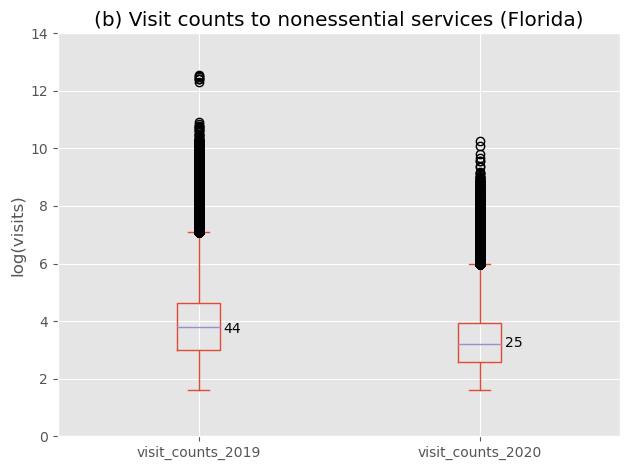

44.0
25.0


In [189]:
plt.figure(figsize=(12, 8), dpi=80)
ax = nes19_20[['visit_counts_2019', 'visit_counts_2020']].plot(kind='box', title='boxplot')

# Display the plot
plt.title('(b) Visit counts to nonessential services (Florida)')
plt.ylabel('log(visits)')
ax.set_ylim(0,14)
plt.tight_layout()
text(1.09, 3.6, '44', fontsize=10)
text(2.09, 3.1, '25', fontsize=10)
plt.savefig('FL_rawvisits_ness.tiff', bbox_inches = 'tight', dpi=300)
plt.show()

print(FL_nonessential_2019['raw_visit_counts'].median())
print(FL_nonessential_2020['raw_visit_counts'].median())

<Figure size 960x640 with 0 Axes>

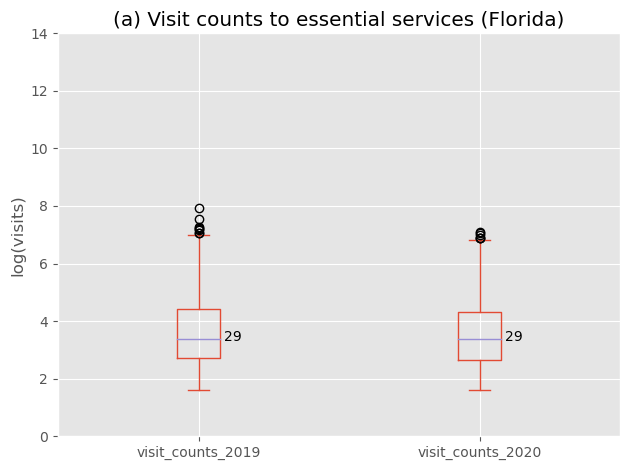

29.0
29.0


In [190]:
plt.figure(figsize=(12, 8), dpi=80)
ax = es19_20[['visit_counts_2019', 'visit_counts_2020']].plot(kind='box', title='boxplot')

plt.title('(a) Visit counts to essential services (Florida)')
plt.ylabel('log(visits)')
ax.set_ylim(0,14)
plt.tight_layout()

text(1.09, 3.3, '29', fontsize=10)
text(2.09, 3.3, '29', fontsize=10)
plt.savefig('FL_rawvisits_ess.tiff', bbox_inches = 'tight', dpi=300)
plt.show()


print(FL_essential_2019['raw_visit_counts'].median())
print(FL_essential_2020['raw_visit_counts'].median())

In [127]:
FL_nonessential_2019
FL_nonessential_2020

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
0,46,224-223@8dk-nh6-ghq,Nina Taylor Pet Salon Longboat Key,Other Personal Services,Pet Care (except Veterinary) Services,27.389710,-82.640605,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,9.0,5.0,"[2,1,2,1,2,1,0]",21531.0
1,88,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2020-03-16T00:00:00-05:00,2020-03-23T00:00:00-05:00,80.0,43.0,"[8,17,22,11,15,5,2]",11842.0
3,143,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,30.0,9.0,"[7,3,6,4,7,3,0]",8237.0
7,267,222-222@8dj-mz6-m6k,North Brandon Family Ymca,Individual and Family Services,Other Individual and Family Services,27.966488,-82.278596,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,19.0,13.0,"[11,6,1,0,1,0,0]",3970.0
8,268,zzw-222@8dj-hfx-st9,MyEyeDr.,Offices of Other Health Practitioners,Offices of Optometrists,28.060542,-81.952946,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,16.0,16.0,"[1,0,5,5,2,2,1]",8987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384656,12891179,223-222@8fy-8dt-8y9,Al's Original Pizza,Restaurants and Other Eating Places,Full-Service Restaurants,28.382874,-81.404086,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,17.0,17.0,"[2,5,2,5,1,0,2]",2280.0
384657,12891231,223-222@8fy-832-kj9,Medical Injury Care Provider Network,Offices of Other Health Practitioners,"Offices of Physical, Occupational and Speech T...",28.553178,-81.403909,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,11.0,7.0,"[3,1,4,2,0,1,0]",13666.0
384662,12891567,223-222@8fy-2r2-xkf,Audiohouse Custom Electronics Design & Install...,Electronics and Appliance Stores,Electronics Stores,27.638616,-80.384790,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,10.0,8.0,"[1,2,2,2,2,1,0]",5534.0
384671,12892033,222-222@8f4-5vd-zvf,Scenic Hills Church Of Christ,Religious Organizations,Religious Organizations,30.531957,-87.238617,FL,2020-04-27T00:00:00-05:00,2020-05-04T00:00:00-05:00,17.0,9.0,"[2,5,2,5,2,0,1]",14728.0
